# 04 Model Development

- Simple and Multiple Linear Regression
- Model Evaluation Using Visualization
- Polynomial Regression and Pipelines
- R-squared and MSE for In-Sample Evaluation
- Prediction and Decision Making

# Model

>a mathematical equation used to predict a value given one or more other values.
relating one or more independent variables or features to dependent variables.

>You input a car model’s highway miles per gallon (MPG) as the independent
variable or feature, the output of the model or dependent variable is the price.

>The more relevant data you have the more accurate your model is.

>You input multiple independent variables or features to your model.
Therefore, your model may predict a more accurate price for the car.

<p align="center"> 
<img src="../images/04_Model_Development/00_intro/01_model.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/00_intro/02_relevant_data.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/00_intro/03_irrelevant_data.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/00_intro/04_types_of_models.png", width=800, height=600>|
</p>

# Setup

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(url)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Simple Linear Regression

>refer to one independent variable to make a prediction.

>understand the relationship between:
- The predictor/independent variable ($X$)
- The target/dependent variable ($Y$)
- $Y$ = $b_0+b_1X$
- $b_0$ = Intercept
- $b_1$ = Slope

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/01_simple_multiple.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/02_simple.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/03_slr_predict.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/04_slr_fit_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/05_slr_fit_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/06_slr_fit_3.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/07_slr_fit_4.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/08_slr_fit_5.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/09_slr_model_fit.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/10_slr_model_predict.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/11_slr_model_estimator.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/12_slr_define_fit_predict.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/13_slr_intercept_coef.png", width=800, height=600>|
</p>

## Load the modules for linear regression

In [3]:
# Import linear_model from scikit-learn
from sklearn.linear_model import LinearRegression

### Create the linear regression object

In [4]:
# Create the linear regression object using the constructor
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### How could Highway-mpg help us predict car price?

> Create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [5]:
# Define predictor/independent variable (X)
X = df[['highway-mpg']]
X.head()

,highway-mpg
0,27
1,27
2,26
3,30
4,22


In [6]:
# Define target/dependent variable(Y)
Y = df['price']
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

## Fit the linear model using highway-mpg.

In [7]:
# Fit the model to find the parameters (intercept and slope)
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Output a prediction

In [8]:
# Obtsin a prediction
Yhat = lm.predict(X)
Yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

## View model parameters

In [9]:
# View value of the Intercept
lm.intercept_

38423.3058581574

In [10]:
# View value of the Slope
lm.coef_

array([-821.73337832])

## Final estimated linear model

- Final linear model with the structure:

  - 𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏 * 𝑋
  - 𝑎 =  Intercept
  - 𝑏 = Slope
 
 
- Plugging in the actual values we get:

  - price = 38423.31 - 821.73 * highway-mpg

## Train Simple Linear Regression model using 'engine-size'

> Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable

>Create a linear function with "engine-size" as the predictor variable and the "price" as the response variable.

In [11]:
lm_engine_size = LinearRegression()
lm_engine_size.fit(df[['engine-size']],df['price'])
Yhat_engine_size = lm_engine_size.predict(df[['engine-size']])
Yhat_engine_size[:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [12]:
lm_engine_size.intercept_

-7963.338906281042

In [13]:
lm_engine_size.coef_

array([166.86001569])

price = 166.86 * engine-size - 7963.34

# Multiple Linear Regression

>refer to multiple independent variables to make a prediction.

>understand the relationship between:
- The predictor/independent variables ($X_1,X_2,..,X_d$)
- The target/dependent variable ($Y$)
- $Y$ = $b_0+b_1X_1+b_2X_2+...+b_dX_d$
- $b_0$ = Intercept
- $b_1$ = Coefficent of variable $X_1$
- $b_2$ = Coefficent of variable $X_2$
- ...
- $b_d$ = Coefficent of variable $X_d$

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/14_mlr_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/15_mlr_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/16_mlr_3.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/17_mlr_define_fit_predict.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/01_linreg/18_mlr_intercept_coefs.png", width=800, height=600>|
</p>

In [14]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [15]:
# develop a model using Horsepower, Curb-weight, Engine-size and Highway-mpg variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22


In [16]:
# Fit the linear model using the four variables
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# value of the Intercept
lm.intercept_

-15806.62462632922

In [18]:
# value of the Slope
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Price = -15806.62 + 53.50 * horsepower + 4.70 * curb-weight + 81.53 * engine-size + 36.06 highway-mpg

## Train Multiple Linear Regression model using 'normalized-losses' and 'highway-mpg'

> Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'

>Create a linear function with 'normalized-losses' and 'highway-mpg' as the predictor variables and the "price" as the response variable.

In [19]:
lm2 = LinearRegression()
Z2 = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Z2,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm2.intercept_

38201.31327245728

In [21]:
lm2.coef_

array([   1.49789586, -820.45434016])

price = 38201.31 + 1.50 * normalized-losses - 820.45 * highway-mpg

# Model Evaluation using Visualization

>evaluate the models to choose the best one using visualization.

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/01_regplot_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/02_regplot_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/03_regplot_create.png", width=800, height=600>|
</p>

In [22]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

## Regression Plot

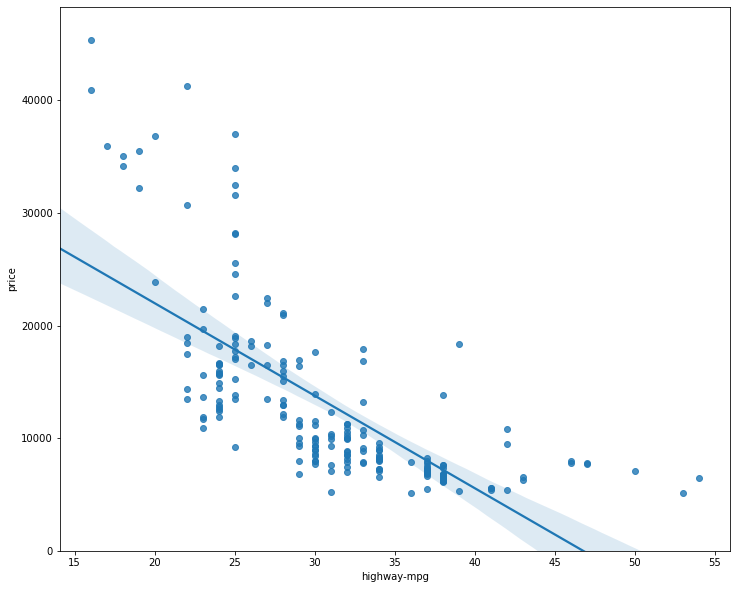

In [23]:
# visualize Horsepower as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.savefig('../figs/04_Model_Development/02_visualize/highway_mpg_price_regplot.png')

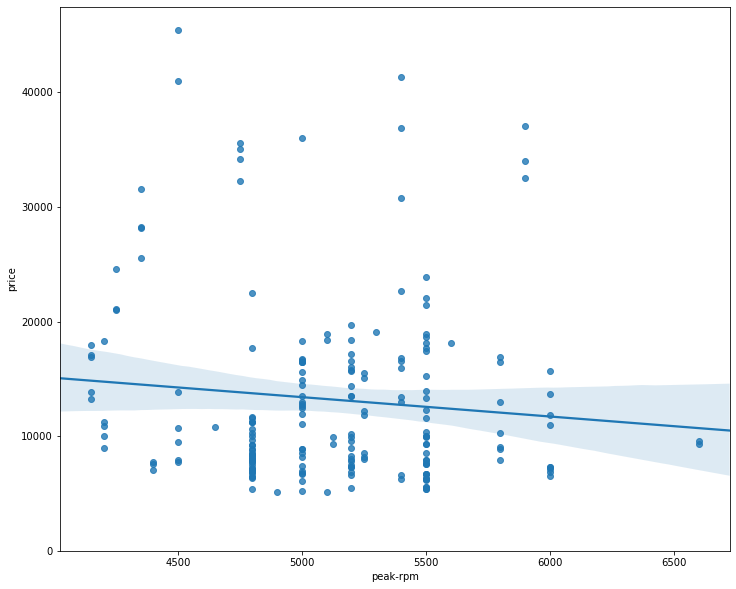

In [24]:
# visualize eak-rpm as potential predictor variable of price:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,);

### Comparing the regression plot of "peak-rpm" and "highway-mpg" 
> the points for "highway-mpg" are much closer to the generated line and on the average decrease. 
- The points for "peak-rpm" have more spread around the predicted line
- it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases

In [25]:
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


## Residual Plot

> visualize the variance of the data

>What is a residual?

>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

> what is a residual plot?

>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

>If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. 

>Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/04_residplot_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/05_residplot_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/06_residplot_spread.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/07_residplot_nonlinear.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/08_residplot_change_variance.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/09_residplot_create.png", width=800, height=600>|
</p>

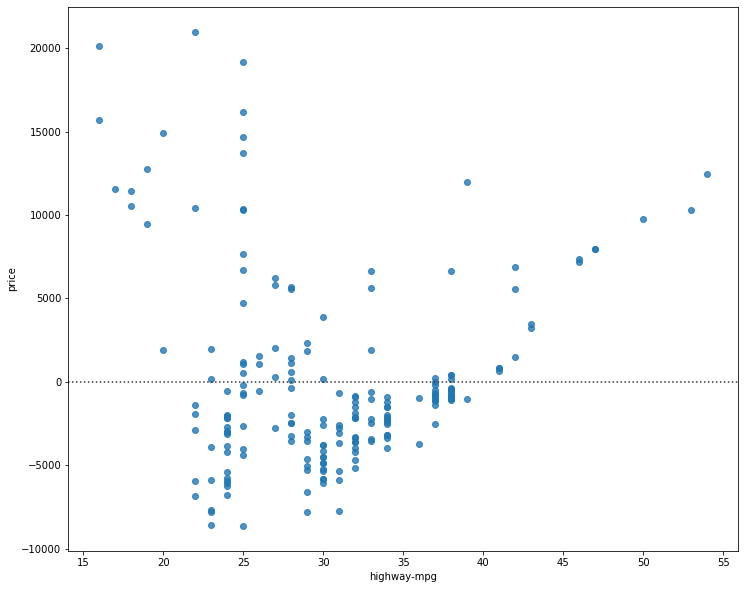

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.savefig('../figs/04_Model_Development/02_visualize/highway_mpg_price_residplot.png')

### Residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

## Multiple Linear Regression
>visualize a model for Multiple Linear Regression

>looking at the distribution plot of the fitted values that result from the model and compare it to the distribution of the actual values.

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/10_distplot_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/11_distplot_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/12_distplot_3.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/13_distplot_4.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/14_distplot_fitted_actual.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/15_distplot_mlr_fitted_actual.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/02_visualize/16_distplot_create.png", width=800, height=600>|
</p>

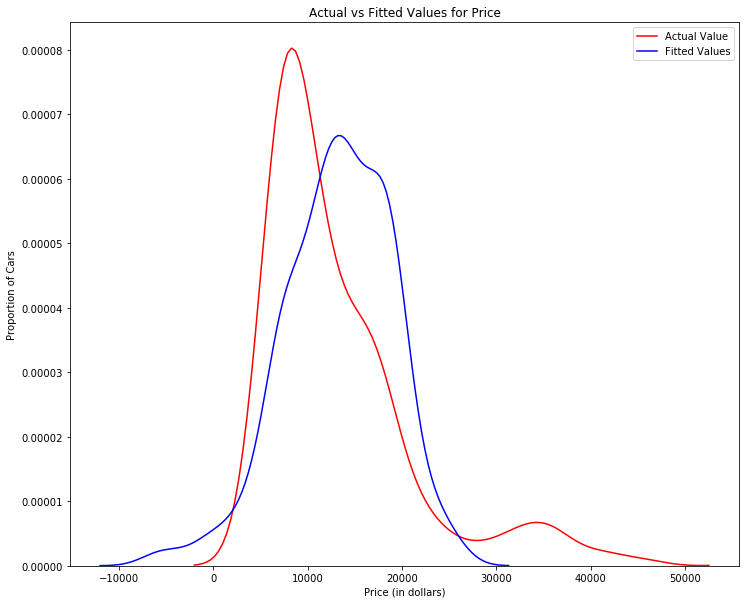

In [27]:
# make a prediction
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.savefig('../figs/04_Model_Development/02_visualize/actual_fitted_values_distplot.png')

### Fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

# Polynomial Regression

>particular case of the general linear regression model or multiple linear regression models.

>get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

>There are different orders of polynomial regression:

>Quadratic - 2nd order
- $Yhat$ = $b_0+b_1X^2+b_2X^2$


<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/01_polyreg.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/02_higher_order.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/03_polyreg_create.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/04_multi_polyreg.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/05_multi_polyreg_create_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/06_multi_polyreg_create_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/07_pre_process.png", width=800, height=600>|
</p>

In [28]:
# use PlotPolly function to plot the data: 
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'{model.order} Order Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price')
    filename = f'../figs/04_Model_Development/03_polyreg/polynomial_fit_price_{Name}_{model.order}_order'
    plt.savefig(filename)

In [29]:
# get the variables
x = df['highway-mpg']
y = df['price']

In [30]:
# fit the polynomial using the function polyfit, 
# use the function poly1d to display the polynomial function.

In [31]:
# use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


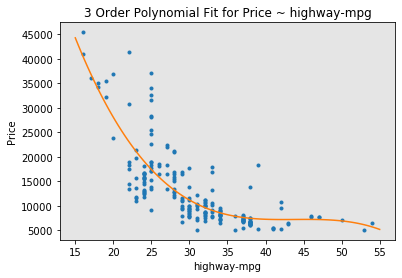

In [32]:
# plot the function
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3);

### Polynomial model performs better than the linear model
>the generated polynomial function "hits" more of the data points.

### Create 11 order polynomial model 

In [33]:
# use a polynomial of the 11th order
f11 = np.polyfit(x, y, 11)
p11 = np.poly1d(f11)
print(p11)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


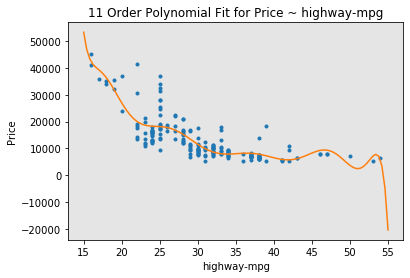

In [34]:
# plot the function
PlotPolly(p11, x, y, 'highway-mpg')

### Perform  polynomial transform on multiple features

In [35]:
# import the module:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
# create a PolynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [37]:
Z_pr=pr.fit_transform(Z)
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [38]:
#The original data is of 201 samples and 4 features
Z.shape

(201, 4)

In [39]:
#after the transformation, there 201 samples and 15 features
Z_pr.shape

(201, 15)

## Pipeline

>Data Pipelines simplify the steps of processing the data. 

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/08_pipeline.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/09_pipeline_create_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/10_pipeline_create_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/03_polyreg/11_pipeline_train.png", width=800, height=600>|
</p>

In [40]:
# use the module Pipeline to create a pipeline.
# use StandardScaler as a step in our pipeline.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
# create the pipeline, by creating a list of tuples including 
# the name of the model or estimator and 
# its corresponding constructor.
Input=[('scale',StandardScaler()), 
       ('polynomial', PolynomialFeatures(include_bias=False)), 
       ('model',LinearRegression())]

In [42]:
# input the list as an argument to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [43]:
# normalize the data, perform a transform and fit the model simultaneously.
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [44]:
# normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Create pipeline that standardize data & performs prediction
>Create a pipeline that standardize the data, then perform prediction using a linear regression model using the features Z and targets y

In [45]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Measures for In-Sample Evaluation

>Quantitative measure to determine how accurate the model is.
- Mean Squared Error (MSE)
- R-squared / R^2 

## Mean Squared Error (MSE)

>The Mean Squared Error measures the average of the squares of errors
- error is the difference between actual value (y) and the estimated value (ŷ).

## R-squared

>R squared = the coefficient of determination
- measure to determine how close the data is to the fitted regression line.
- percentage of variation of the response variable (y) that is explained by a linear model.
- compare regression model to mean of data points

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/01_meaures_model_fit.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/02_actual_pred.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/03_error_squared.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/04_mse.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/05_mse_calculate.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/06_r_squared.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/07_average.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/08_reg_avg.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/09_good_fit_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/10_good_fit_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/11_good_fit_3.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/12_bad_fit_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/13_bad_fit_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/14_bad_fit_3.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/04_measure/15_r_squared_calculate.png", width=800, height=600>|
</p>

### Model 1: Simple Linear Regression

In [46]:
# calculate the MSE
# predict the output i.e., "yhat" using the predict method, 
# where X is the input variable

# highway_mpg_fit
lm.fit(X, Y)

Y_pred_simple=lm.predict(X)

In [47]:
print('The output of the first four predicted values is:\n',\
      [float('{:.1f}'.format(i)) for i in Y_pred_simple[0:4]])

The output of the first four predicted values is:
 [16236.5, 16236.5, 17058.2, 13771.3]


In [48]:
print('The output of the first four actual values is:\n',\
      Y[0:4].tolist())

The output of the first four actual values is:
 [13495.0, 16500.0, 16500.0, 13950.0]


In [49]:
# import the function mean_squared_error from the module metrics
from sklearn.metrics import mean_squared_error

In [50]:
# compare the predicted results with the actual results 
mse = mean_squared_error(df['price'], Y_pred_simple)
print(f'The mean square error of price and predicted value using Simple Linear Regression is:\n{mse:,.2f}')

The mean square error of price and predicted value using Simple Linear Regression is:
31,635,042.94


In [51]:
# calculate the R^2
#highway_mpg_fit
lm.fit(X, Y)

# Find the R^2
r_squared = lm.score(X, Y)
print(f'The R-square is: {float(r_squared):.5f}')

The R-square is: 0.49659


> ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

### Model 2: Multiple Linear Regression

In [52]:
# calculate the MSE
# produce a prediction

# fit the model 
lm.fit(Z, df['price'])

Y_pred_multi = lm.predict(Z)

In [53]:
print('The output of the first four predicted values is:\n',\
      [float('{:.1f}'.format(i)) for i in Y_pred_multi[0:4]])

The output of the first four predicted values is:
 [13699.1, 13699.1, 19051.7, 10620.4]


In [54]:
print('The output of the first four actual values is:\n',\
      Y[0:4].tolist())

The output of the first four actual values is:
 [13495.0, 16500.0, 16500.0, 13950.0]


In [55]:
# compare the predicted results with the actual results
mse_multi = mean_squared_error(df['price'], Y_pred_multi)
print(f'The mean square error of price and predicted value using  Multiple Regression is:\n{mse_multi:,.2f}')

The mean square error of price and predicted value using  Multiple Regression is:
11,980,366.87


In [56]:
# calculate the R^2
# fit the model 
lm.fit(Z, df['price'])

# Find the R^2
r_squared = lm.score(Z, df['price'])
print(f'The R-square is: {float(r_squared):.5f}')

The R-square is: 0.80936


### ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

### Model 3: Polynomial Fit

In [57]:
# MSE
# calculate the MSE:
mse_poly = mean_squared_error(df['price'], p(x))

In [58]:
print('The output of the first four predicted values is:\n',\
      [float('{:.1f}'.format(i)) for i in p(x)[0:4]])

The output of the first four predicted values is:
 [14483.5, 14483.5, 15876.8, 11210.2]


In [59]:
print('The output of the first four actual values is:\n',\
      Y[0:4].tolist())

The output of the first four actual values is:
 [13495.0, 16500.0, 16500.0, 13950.0]


In [60]:
# compare the predicted results with the actual results
print(f'The mean square error of price and predicted value using Polynomial Regression is:\n{mse_poly:,.2f}')

The mean square error of price and predicted value using Polynomial Regression is:
20,474,146.43


In [61]:
# calculate the R^2
# import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score

# apply the function to get the value of r^2
r_squared = r2_score(Y, p(x))
print(f'The R-square is: {float(r_squared):.5f}')

The R-square is: 0.67419


### ~ 67.419 % of the variation of price is explained by this polynomial fit

# Prediction and Decision Making

## Determining a Good Model Fit

>How do we determine a good model fit?

>What is a good MSE?
- model with the smallest MSE value is a better fit for the data.

>What is a good R-squared value?
- model with the higher R-squared value is a better fit for the data.

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/01_final_best_fit.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/02_predicted_value.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/03_range.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/04_predict_new_values_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/05_predict_new_values_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/06_regplot_visualize.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/07_residplot_visualize.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/08_distplot_visualize.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/09_mse_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/10_mse_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/11_mse_3.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/12_r_squared_1.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/13_r_squared_2.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/14_r_squared_3.png", width=800, height=600>|
</p>

<p align="center"> 
<img src="../images/04_Model_Development/05_predict/15_mlr_slr.png", width=800, height=600>|
</p>

## Prediction 

In [62]:
# use the method predict to produce a prediction.
# import pyplot for plotting
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [63]:
# Create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [64]:
# Fit the model
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

In [66]:
yhat[-5:]

array([-39641.36508243, -40463.09846075, -41284.83183907, -42106.56521739,
       -42928.29859571])

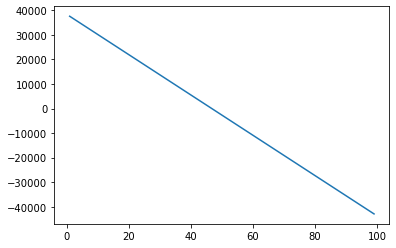

In [67]:
# Plot the data
plt.plot(new_input, yhat)
plt.show()

### Values for the different models.

### Simple Linear Regression: 
> Using Highway-mpg as a Predictor Variable of Price.
- MSE: 3.16 x10^7
- R-squared: 0.49659

### Multiple Linear Regression: 
>Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
- MSE: 1.2 x10^7
- R-squared: 0.80936

### Polynomial Fit: 
>Using Highway-mpg as a Predictor Variable of Price.
- MSE: 2.05 x 10^7
- R-squared: 0.67419

### The more variables you have, the better your model is at predicting, but this is not always true. 
- you should always check the MSE and R^2.

### Conclusion:
>MLR model is the best model to be able to predict price from the dataset. 
>we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.